In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
fake = pd.read_csv(r"C:\Users\anjan\Downloads\Fake.csv")
true = pd.read_csv(r"C:\Users\anjan\Downloads\True.csv")

In [3]:
fake.shape

(23481, 4)

In [4]:
true.shape

(21417, 4)

In [5]:
fake['target'] = 'fake'
true['target'] = 'true'

In [6]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [7]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [8]:
data.head()

,title,text,subject,date,target
0,Vietnam news agency apologizes over false repo...,HANOI (Reuters) - Vietnam s state-run news age...,worldnews,"December 9, 2017",true
1,NEW VIDEO: NICE TERROR ATTACK…What The Media’s...,SHARE this video everywhere. We cannot allow t...,politics,"Jul 15, 2016",fake
2,Conservatives VICIOUSLY Attack Michelle Obama...,Donald Trump s army of deplorables are vicious...,News,"October 13, 2016",fake
3,"U.S. looks to Facebook, private groups to batt...","WASHINGTON (Reuters) - The U.S. government, ac...",politicsNews,"February 25, 2016",true
4,This NRA Commercial Is So Stupid It Will Melt...,A few days after the Planned Parenthood shooti...,News,"March 4, 2016",fake


In [9]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Vietnam news agency apologizes over false repo...,HANOI (Reuters) - Vietnam s state-run news age...,worldnews,true
1,NEW VIDEO: NICE TERROR ATTACK…What The Media’s...,SHARE this video everywhere. We cannot allow t...,politics,fake
2,Conservatives VICIOUSLY Attack Michelle Obama...,Donald Trump s army of deplorables are vicious...,News,fake
3,"U.S. looks to Facebook, private groups to batt...","WASHINGTON (Reuters) - The U.S. government, ac...",politicsNews,true
4,This NRA Commercial Is So Stupid It Will Melt...,A few days after the Planned Parenthood shooti...,News,fake


In [10]:
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,HANOI (Reuters) - Vietnam s state-run news age...,worldnews,true
1,SHARE this video everywhere. We cannot allow t...,politics,fake
2,Donald Trump s army of deplorables are vicious...,News,fake
3,"WASHINGTON (Reuters) - The U.S. government, ac...",politicsNews,true
4,A few days after the Planned Parenthood shooti...,News,fake


In [11]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,hanoi (reuters) - vietnam s state-run news age...,worldnews,true
1,share this video everywhere. we cannot allow t...,politics,fake
2,donald trump s army of deplorables are vicious...,News,fake
3,"washington (reuters) - the u.s. government, ac...",politicsNews,true
4,a few days after the planned parenthood shooti...,News,fake


In [12]:
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [13]:
data.head()

,text,subject,target
0,hanoi reuters vietnam s staterun news agency ...,worldnews,true
1,share this video everywhere we cannot allow th...,politics,fake
2,donald trump s army of deplorables are vicious...,News,fake
3,washington reuters the us government acknowle...,politicsNews,true
4,a few days after the planned parenthood shooti...,News,fake


In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anjan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
data.head()

,text,subject,target
0,hanoi reuters vietnam staterun news agency apo...,worldnews,true
1,share video everywhere cannot allow leftist me...,politics,fake
2,donald trump army deplorables viciously attack...,News,fake
3,washington reuters us government acknowledging...,politicsNews,true
4,days planned parenthood shooting colorado spri...,News,fake


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


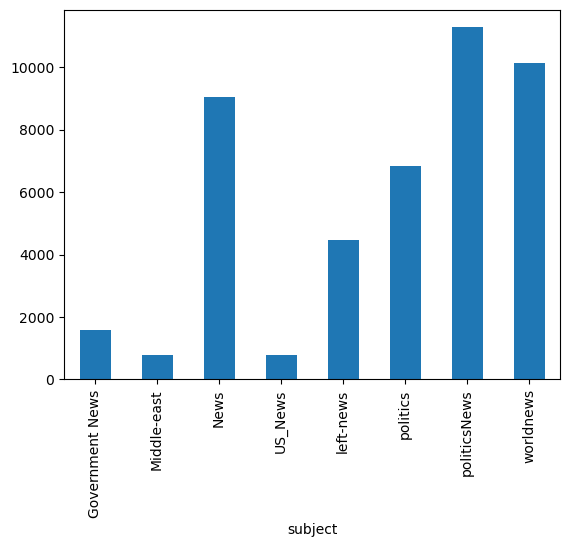

In [16]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


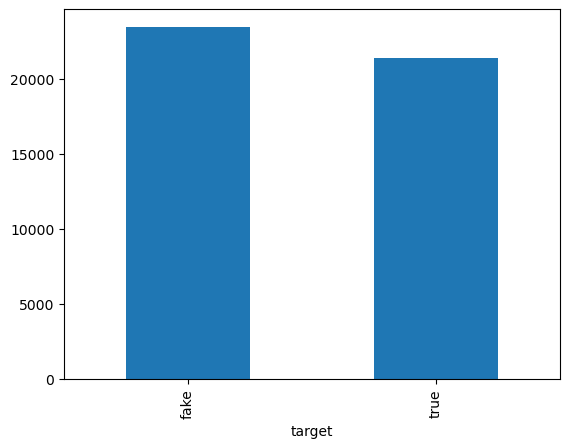

In [17]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

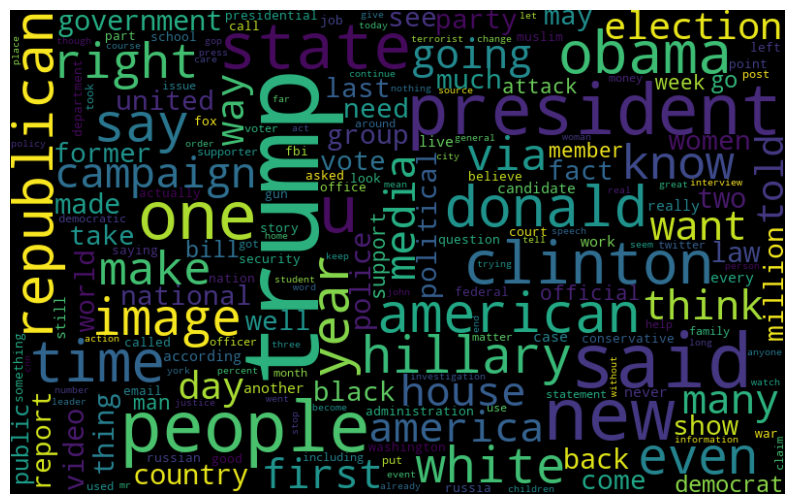

In [18]:
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

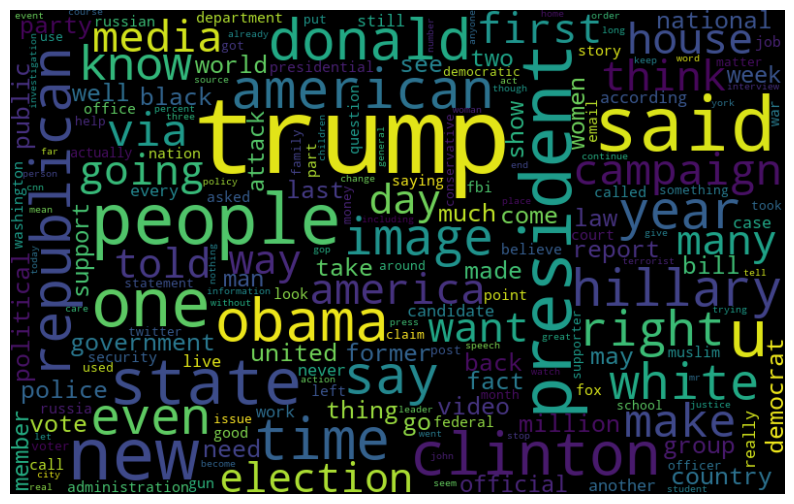

In [19]:
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

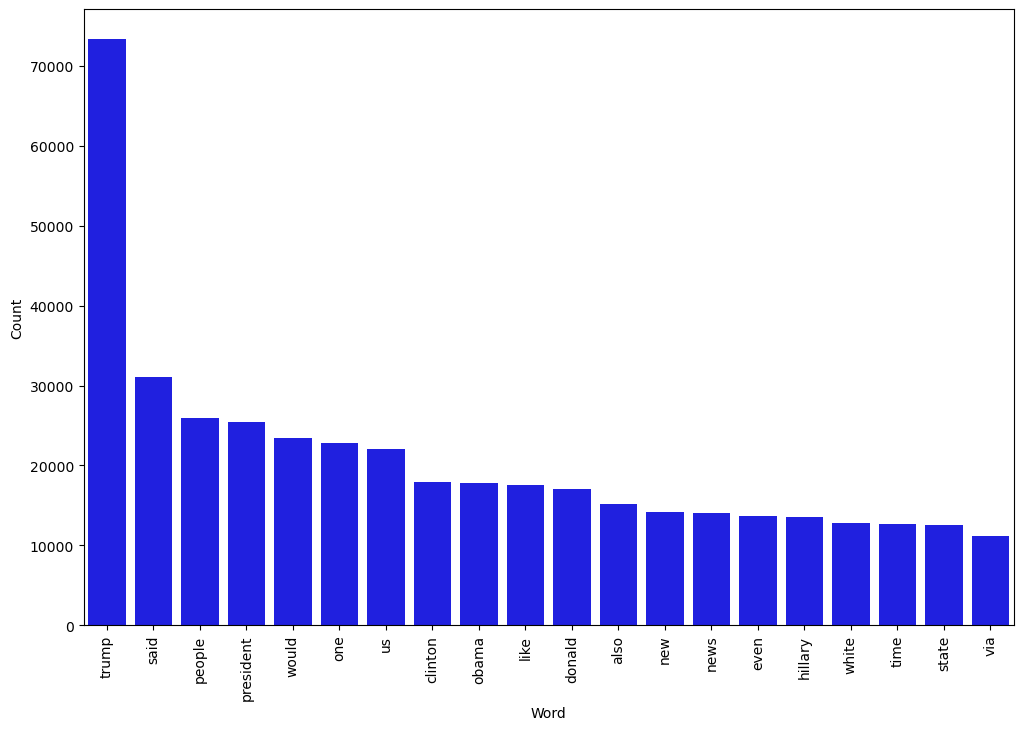

In [21]:
counter(data[data["target"] == "fake"], "text", 20)

In [24]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [25]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.88%


Confusion matrix, without normalization


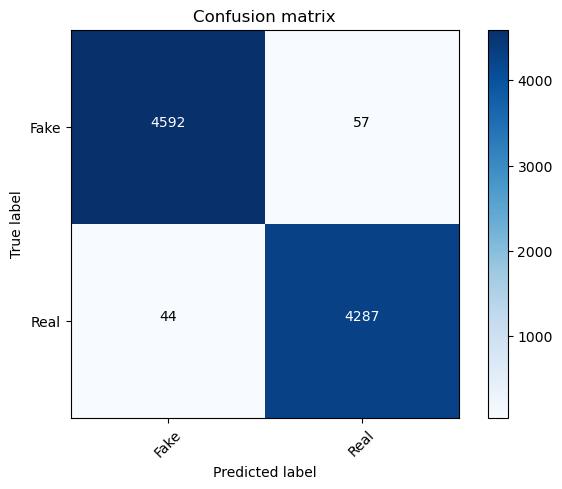

In [27]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [30]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.64%


In [29]:
from sklearn.tree import DecisionTreeClassifier

Confusion matrix, without normalization


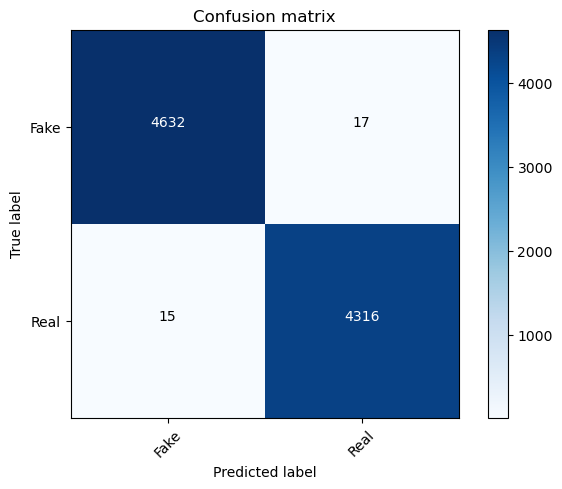

In [31]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [32]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.0%


Confusion matrix, without normalization


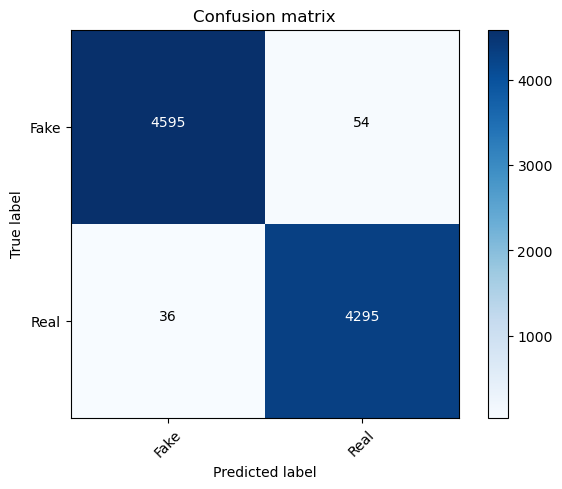

In [33]:
 cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [34]:
Import matplotlib.pyplot as plt

SyntaxError: invalid syntax (2857093144.py, line 1)

In [35]:
import matplotlib.pyplot as plt


In [36]:
Plt.figure(figsize=(8,7))

NameError: name 'Plt' is not defined

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 7))
plt.bar(list(dct.keys()), list(dct.values()), color=['blue', 'red', 'yellow', 'orange', 'pink'])
Plt.ylim(90,100)
Plt.yticks((91,92,93,94,95,96,97,98,99,100))


NameError: name 'dct' is not defined

<Figure size 800x700 with 0 Axes>

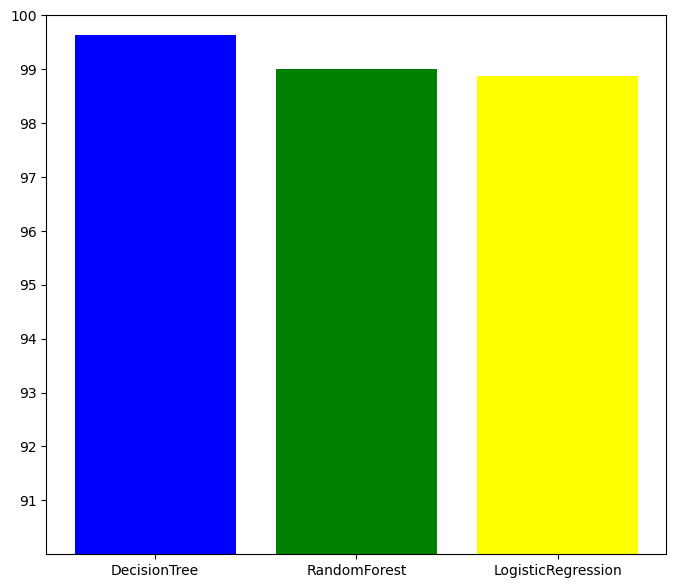

In [44]:
import matplotlib.pyplot as plt

# Assuming you have a dictionary named data_dict
data_dict = {'DecisionTree': 99.64, 'RandomForest': 99, 'LogisticRegression': 98.88}

plt.figure(figsize=(8, 7))
plt.bar(list(data_dict.keys()), list(data_dict.values()), color=['blue', 'green', 'yellow'])
plt.ylim(90, 100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))
plt.show()
